In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import copy

In [2]:
# source = https://www.youtube.com/watch?v=TuwAVjmZj4w

In [3]:
# helpfull classes
class Matrix():
    def __init__(self, data):
        self.data = np.array(data)
    
    def __mul__(self, matrix):
        m1 = copy(self.data)
        m2 = copy(matrix.data)
        return Matrix(np.matmul(m1, m2))
    
    def transpose(self):
        return Matrix(self.data.transpose())
    
    def gram_schmidt(self):
        basis = []
        for v in self.data:
            w = v - np.sum( np.dot(v,b)*b  for b in basis )
            basis.append(w/np.linalg.norm(w))
        return Matrix(basis)
    
    def __repr__(self):
        return f"{self.data.astype('float16')}"

class RotationMatrix(Matrix):
    def __init__(self, a, b, y):
        self.data = np.array([
            [np.cos(a)*np.cos(b), 
             np.cos(a)*np.sin(b)*np.sin(y) - np.sin(a)*np.cos(y), 
             np.cos(a)*np.sin(b)*np.cos(y) + np.sin(a)*np.sin(y)],
            [np.sin(a)*np.cos(b), 
             np.sin(a)*np.sin(b)*np.sin(y) + np.cos(a)*np.cos(y), 
             np.sin(a)*np.sin(b)*np.cos(y) - np.cos(a)*np.sin(y)],
            [-np.sin(b), 
             np.cos(b)*np.sin(y), 
             np.cos(b)*np.cos(y)]
        ])
             

class ScaleMatrix(Matrix):
    def __init__(self, x, y, z):
        self.data = np.array([
            [x, 0, 0],
            [0, y, 0],
            [0, 0, z],
        ])
        
class ShiftMatrix(Matrix):
    pass
        
class Viewer:
    def __init__(self, data):
        self.data = np.array(data)
    
    def add_ones_to_end(self):
        o = np.ones(self.data.shape[0]).reshape(1, -1)
        self.data = np.append(self.data, np.ones(self.data.shape[0]).reshape(-1, 1), axis=1)
        
    def show(self):
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.set_xlim([-10, 10])
        ax.set_ylim([-10, 10])
        ax.set_zlim([-10, 10])
        ax.scatter(self.data[:, 0], self.data[:, 1], self.data[:, 2])
        
    def apply(self, matrix):
        vectors = []
        for v in self.data:
            vectors.append(np.matmul(matrix, v))
        return Viewer(vectors)

In [4]:
"""
A = R * S * H
    A - affine transformation
    R - rotation matrix  (R^T == R^-1)
    S - scale matrix  
    H - shift matrix  (triangle matrix)

A = Q*B - where (Q^T == Q^-1)
B = Right triangle matrix or left

"""

'\nA = R * S * H\n    A - affine transformation\n    R - rotation matrix  (R^T == R^-1)\n    S - scale matrix  \n    H - shift matrix  (triangle matrix)\n\nA = Q*B - where (Q^T == Q^-1)\nB = Right triangle matrix or left\n\n'

In [5]:
v = []
for i in range(-4, 7, 2):
    for j in range(-4, 7, 2):
        for k in range(-4, 7, 2):
            v.append(np.array([i, j, k]))
viever = Viewer(v)

In [6]:
# create R, S, H
R = RotationMatrix(np.pi / 4, 0, 0)
S = ScaleMatrix(1, 2, 3)
H = ShiftMatrix([
    [1, 2, 6, 0],
    [0, 1, 2, 0],
    [0, 0, 1, 0],
    [0, 0, 0, 1],
])
print('R')
print(R)
print('S')
print(S)
print('H')
print(H)

R
[[ 0.707 -0.707  0.   ]
 [ 0.707  0.707  0.   ]
 [-0.     0.     1.   ]]
S
[[1. 0. 0.]
 [0. 2. 0.]
 [0. 0. 3.]]
H
[[1. 2. 6. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [7]:
# R, S, H to same shape (4, 4)
R.data = np.append(R.data, [[0, 0, 0]], axis=0)
R.data = np.append(R.data, [[0], [0], [0], [1]], axis=1)
S.data = np.append(S.data, [[0, 0, 0]], axis=0)
S.data = np.append(S.data, [[0], [0], [0], [1]], axis=1)
print('R')
print(R)
print('S')
print(S)
print('H')
print(H)

R
[[ 0.707 -0.707  0.     0.   ]
 [ 0.707  0.707  0.     0.   ]
 [-0.     0.     1.     0.   ]
 [ 0.     0.     0.     1.   ]]
S
[[1. 0. 0. 0.]
 [0. 2. 0. 0.]
 [0. 0. 3. 0.]
 [0. 0. 0. 1.]]
H
[[1. 2. 6. 0.]
 [0. 1. 2. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [8]:
A = R * S * H
A

[[0.707 0.    1.414 0.   ]
 [0.707 2.828 7.07  0.   ]
 [0.    0.    3.    0.   ]
 [0.    0.    0.    1.   ]]

In [9]:
Q = A.gram_schmidt()
Q

/tmp/ipykernel_57884/4238558992.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  w = v - np.sum( np.dot(v,b)*b  for b in basis )


[[ 0.4473  0.      0.8945  0.    ]
 [-0.596   0.745   0.298   0.    ]
 [-0.6665 -0.6665  0.3333  0.    ]
 [ 0.      0.      0.      1.    ]]

In [10]:
# Q^T == Q^-1 -> Q * Q^T = I
Q * Q.transpose()

[[ 1. -0. -0.  0.]
 [-0.  1.  0.  0.]
 [-0.  0.  1.  0.]
 [ 0.  0.  0.  1.]]

In [11]:
# determinant Q = 1
np.linalg.det(Q.data)

1.0

In [12]:
# B - should be triangle matrix
B = Q.transpose() * A
B
# might something done wrong. I ecpected to see right traingle matrix                          !!!

[[-0.1054 -1.687  -5.582   0.    ]
 [ 0.527   2.107   3.27    0.    ]
 [ 0.8433  0.8433  4.375   0.    ]
 [ 0.      0.      0.      1.    ]]

In [13]:
# same determinants for B and SH 
np.linalg.det(B.data), np.linalg.det((S * H).data),

(6.0, 6.0)

In [14]:
QB = Q * B

In [15]:
(QB.data - A.data).sum()
# I think differanse occured because bit number limit cann't contain difficult calculations fully. 
# So diff value is vary small, therefor I decide to think that Q*B and A matrixes are same.

-2.220446049250313e-16

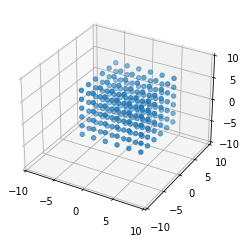

In [16]:
viever.show()

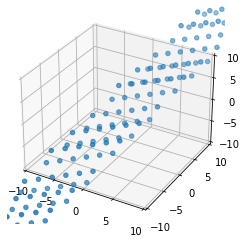

In [17]:
# show applying A
viever.apply(A.data[:3, :3]).show()

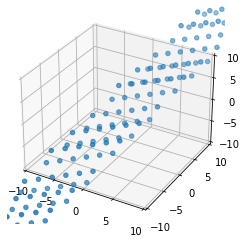

In [18]:
# show applying Q * B
viever.apply((QB).data[:3, :3]).show()